
please mount google drive before you begin

# Part I: Set-up

In [3]:
cd /content/drive/MyDrive/DEX_Uniswap_Layer2/Eth

/content/drive/MyDrive/DEX_Uniswap_Layer2/Eth


In [4]:
pwd

'/content/drive/MyDrive/DEX_Uniswap_Layer2/Eth'

In [5]:
# importing pandas libraries and
# glob module
import pandas as pd

In [9]:
df_Eth = pd.read_csv("Eth.csv",index_col="Unnamed: 0")
df_Eth['Timestamp']=pd.to_datetime(df_Eth['Timestamp'])
df_Eth.dtypes

Timestamp     datetime64[ns]
Amount_USD           float64
dtype: object

In [10]:
df_Eth.tail()

,Timestamp,Amount_USD
12748927,2022-12-31 23:59:35,23.856062
12748929,2022-12-31 23:59:47,24.699142
12748928,2022-12-31 23:59:47,24.728120
12748930,2022-12-31 23:59:59,1414.931247
12748931,2022-12-31 23:59:59,4472.380851


In [11]:
df_Eth['date'] =df_Eth['Timestamp'].dt.date
df_Eth

,Timestamp,Amount_USD,date
22079447,2021-06-01 00:00:20,6514.371593,2021-06-01
22079460,2021-06-01 00:00:20,493.240466,2021-06-01
22079459,2021-06-01 00:00:20,2499.814636,2021-06-01
22079457,2021-06-01 00:00:20,6514.371593,2021-06-01
22079456,2021-06-01 00:00:20,122.752035,2021-06-01
...,...,...,...
12748927,2022-12-31 23:59:35,23.856062,2022-12-31
12748929,2022-12-31 23:59:47,24.699142,2022-12-31
12748928,2022-12-31 23:59:47,24.728120,2022-12-31
12748930,2022-12-31 23:59:59,1414.931247,2022-12-31


# Part II Calculating Daily Transaction Volume

In [20]:
import numpy as np
# Calculate statistics for 'Amount_USD' column and add count of observations
agg_funcs = {
    'Amount_USD': [np.min, np.max, np.sum, np.std, np.var, np.mean, np.median, lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 25)]
}

# Add count of observations
agg_funcs['Amount_USD'].append(lambda x: x.count())

# Convert the 'date' column to datetime
#df_Eth['date'] = pd.to_datetime(df_Eth['date'])
df_Eth_volume = df_Eth.groupby('date').agg(agg_funcs).reset_index()

# Rename the columns for clarity
df_Eth_volume.columns = ['date', 'min', 'max', 'sum', 'std', 'var', 'mean', 'median', 'percentile_75', 'percentile_25', 'count']

df_Eth_volume

,date,min,max,sum,std,var,mean,median,percentile_75,percentile_25,count
0,2021-06-01,0.0,8.007652e+06,1.751660e+09,141649.596193,2.006461e+10,35075.282657,1564.161238,8914.135166,269.674992,49940
1,2021-06-02,0.0,1.684953e+07,8.047736e+08,153228.716358,2.347904e+10,25281.110376,1342.518070,6817.650462,271.807574,31833
2,2021-06-03,0.0,5.434681e+06,1.021700e+09,116593.020358,1.359393e+10,29165.598009,1770.524731,9175.334583,288.900547,35031
3,2021-06-04,0.0,7.923601e+06,8.497668e+08,138547.081837,1.919529e+10,27152.567765,1778.196100,8237.954013,287.928834,31296
4,2021-06-05,0.0,3.488883e+06,7.776269e+08,113584.277429,1.290139e+10,25552.096195,1446.201255,7469.966619,237.516244,30433
...,...,...,...,...,...,...,...,...,...,...,...
574,2022-12-27,0.0,1.012890e+07,5.352088e+08,143053.303144,2.046425e+10,15722.015118,847.107685,3336.881927,180.320792,34042
575,2022-12-28,0.0,8.722931e+06,4.719896e+08,122220.093380,1.493775e+10,13202.137495,772.485803,2873.665244,170.913352,35751
576,2022-12-29,0.0,7.717882e+06,4.137302e+08,122820.092412,1.508478e+10,12077.245626,750.957671,3090.902018,152.210051,34257
577,2022-12-30,0.0,2.651389e+06,2.663733e+08,55085.969156,3.034464e+09,8697.334061,636.655419,2495.374304,143.240789,30627


In [21]:
df_Eth_volume.to_csv("Eth_volume.csv")

In [22]:
df_Eth_volume.dtypes

date              object
min              float64
max              float64
sum              float64
std              float64
var              float64
mean             float64
median           float64
percentile_75    float64
percentile_25    float64
count              int64
dtype: object

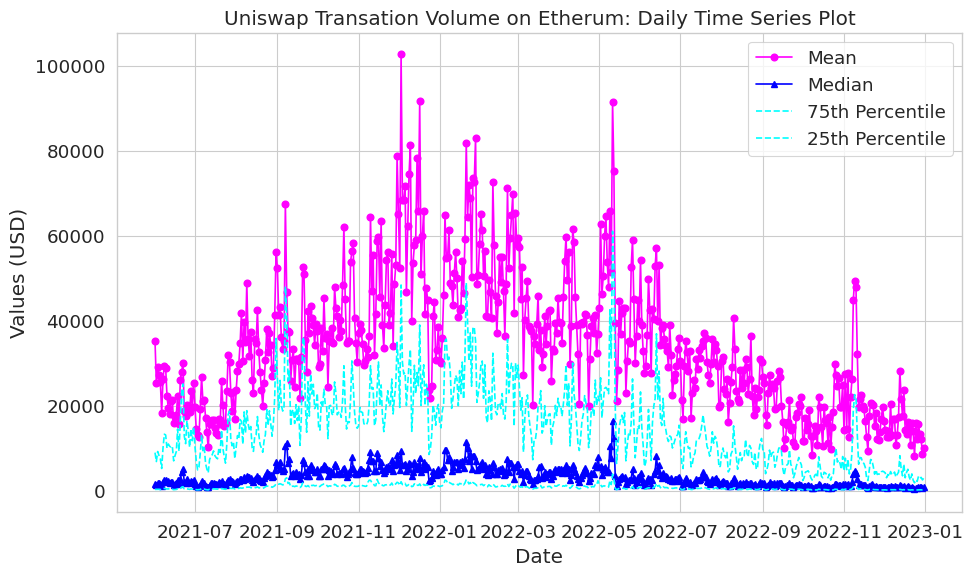

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df =df_Eth_volume.copy()
df['date'] = pd.to_datetime(df['date'])
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'mean' with a warm color and solid line
plt.plot(df.index, df['mean'], label='Mean', marker='o', color='magenta', linestyle='-')

# Plot 'median', '75th Percentile', and '25th Percentile' with the same cold color and different markers
plt.plot(df.index, df['median'], label='Median', marker='^', color='blue', linestyle='-')
plt.plot(df.index, df['percentile_75'], label='75th Percentile', color='cyan', linestyle='--')
plt.plot(df.index, df['percentile_25'], label='25th Percentile',  color='cyan', linestyle='--')

# Customize the plot
plt.title('Uniswap Transation Volume on Etherum: Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values (USD)')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_volume.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


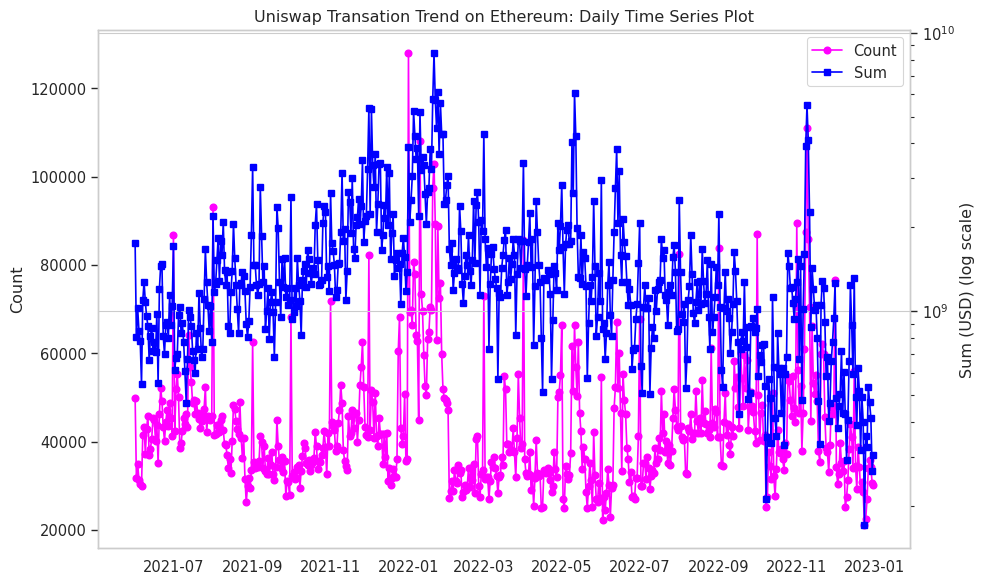

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df_Eth_volume['date'] = pd.to_datetime(df_Eth_volume['date'])

df =df_Eth_volume.copy()
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.2)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'count' on the primary y-axis
count_line, = plt.plot(df.index, df['count'], label='Count', marker='o', color='magenta', linestyle='-')
plt.ylabel('Count')

# Create a secondary y-axis for 'sum' with a logarithmic scale
ax2 = plt.twinx()
ax2.set_yscale("log")  # Apply logarithmic scale to the secondary y-axis
sum_line, = ax2.plot(df.index, df['sum'], label='Sum', marker='s', color='blue', linestyle='-')
ax2.set_ylabel('Sum (USD) (log scale)')


# Combine legends from both axes
lines = [count_line, sum_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')

# Customize the plot
plt.title('Uniswap Transation Trend on Ethereum: Daily Time Series Plot')
plt.xlabel('Date')
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_transaction_trend.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


# Part III Calculating Decentralized Index

In [17]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz

In [18]:
def index(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = (df['Amount_USD']/df['Amount_USD'].sum())*100
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'Amount_USD' not in df.columns:
        return None
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['Amount_USD'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df):
    df.sort_values(by=['Amount_USD'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0

"""
def index_calc(data):

            :param data: dataframe containing transaction Amount_USD and timestamp of the transaction (Timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index Amount_USD and date
"""
from tqdm import tqdm
def index_calc(data,  start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['date'] >= start_date) & (data['date'] < end_date)].copy())

    return IndexValues

In [19]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data
start = date(2021,6,1)
end = date(2022,12,31)
results = index_calc(df_Eth,start,end)
results.to_csv("Eth_Entropy.csv")
results

  0%|          | 0/579 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 1/579 [00:02<27:08,  2.82s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 2/579 [00:05<26:54,  2.80s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  1%|          | 3/579 [00:08<26:49,  2.79s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  1%|          | 4/579 [00:11<26:30,  2.77s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: Runtime

,val,date
0,6740.347527,2021-06-01
1,3171.262522,2021-06-02
2,4611.240051,2021-06-03
3,3485.132441,2021-06-04
4,3392.989487,2021-06-05
...,...,...
574,2023.466775,2022-12-27
575,2172.016372,2022-12-28
576,2019.366839,2022-12-29
577,2634.372301,2022-12-30


In [18]:
df = pd.read_csv("Eth_Entropy.csv", index_col="Unnamed: 0")
df.tail()

,val,date
372,2023.466775,2022-12-27
373,2172.016372,2022-12-28
374,2019.366839,2022-12-29
375,2634.372301,2022-12-30
376,2144.311502,2022-12-31


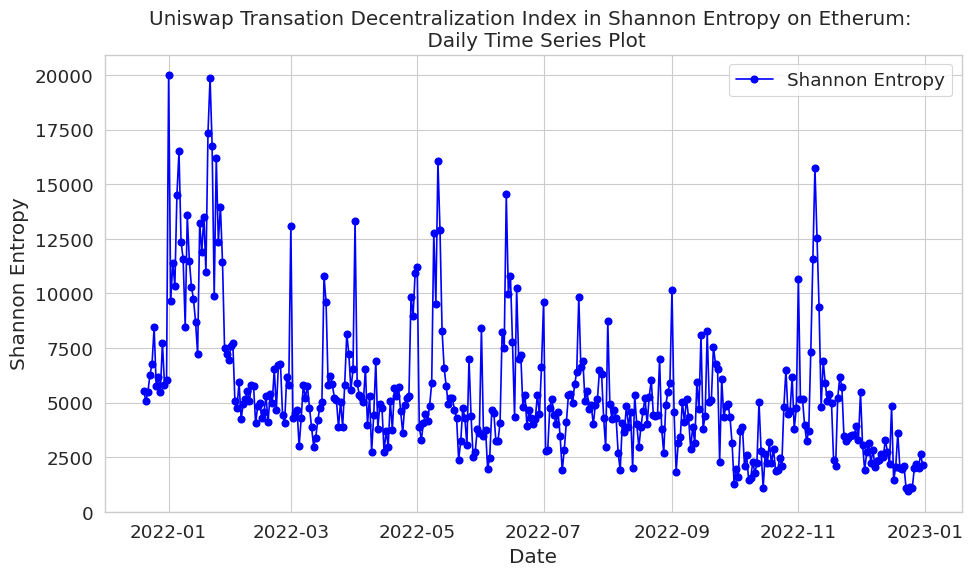

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Shannon Entropy', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Shannon Entropy on Etherum: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_entropy.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [25]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2021,6,1)
end = date(2022,12,31)
results_HHI = index_calc(df_Eth,start,end,HHI)
results_HHI.to_csv("Eth_HHI.csv")
results_HHI

100%|██████████| 579/579 [26:44<00:00,  2.77s/it]


,val,date
0,3.465901,2021-06-01
1,11.853901,2021-06-02
2,4.847284,2021-06-03
3,8.638513,2021-06-04
4,6.821276,2021-06-05
...,...,...
574,24.613081,2022-12-27
575,24.251277,2022-12-28
576,30.480377,2022-12-29
577,13.424089,2022-12-30


In [26]:
df = pd.read_csv("Eth_HHI.csv", index_col="Unnamed: 0")
df.tail()

,val,date
574,24.613081,2022-12-27
575,24.251277,2022-12-28
576,30.480377,2022-12-29
577,13.424089,2022-12-30
578,26.365769,2022-12-31


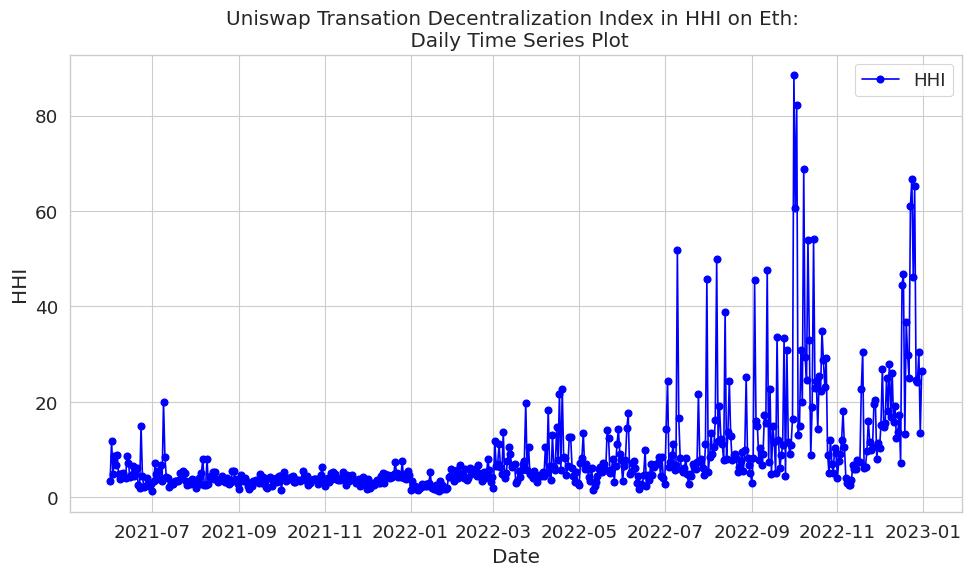

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='HHI', marker='o',color='blue')


# Customize the plot
#plt.ylim(0, 200)  # Set y-axis limits
plt.title('Uniswap Transation Decentralization Index in HHI on Eth: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_HHI.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [34]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2021,6,1)
end = date(2022,12,31)
results_gini = index_calc(df_Eth,start,end,gini)
results_gini.to_csv("Eth_gini.csv")
results_gini

100%|██████████| 579/579 [26:52<00:00,  2.79s/it]


,val,date
0,0.887024,2021-06-01
1,0.900631,2021-06-02
2,0.885589,2021-06-03
3,0.892484,2021-06-04
4,0.896821,2021-06-05
...,...,...
574,0.918054,2022-12-27
575,0.916477,2022-12-28
576,0.910410,2022-12-29
577,0.899574,2022-12-30


In [35]:
df = pd.read_csv("Eth_gini.csv", index_col="Unnamed: 0")
df.tail()

,val,date
574,0.918054,2022-12-27
575,0.916477,2022-12-28
576,0.910410,2022-12-29
577,0.899574,2022-12-30
578,0.904009,2022-12-31


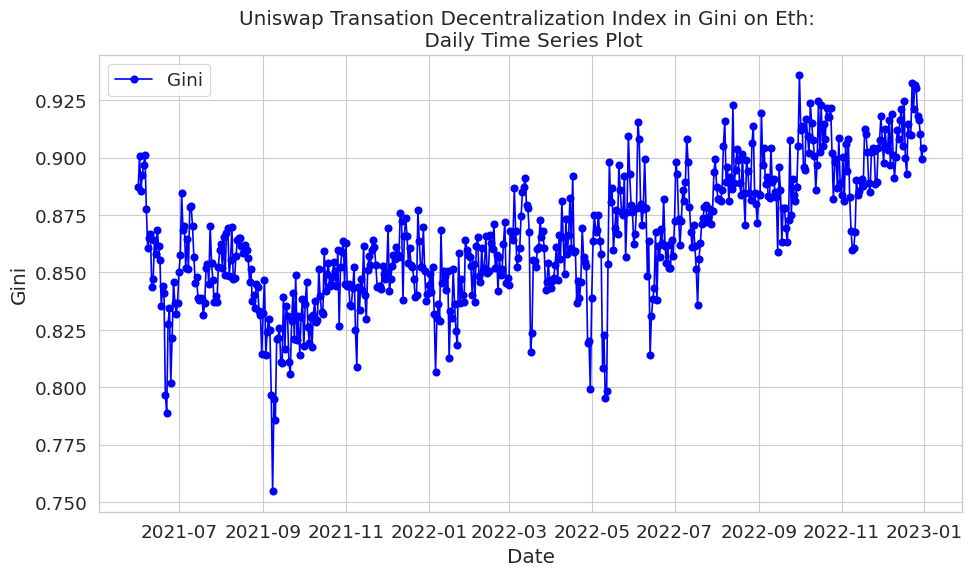

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Gini', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Gini on Eth: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_gini.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [37]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2021,6,1)
end = date(2022,12,31)
results_nakamoto = index_calc(df_Eth,start,end,nakamoto)
results_nakamoto.to_csv("Eth_nakamoto.csv")
results_nakamoto

100%|██████████| 579/579 [26:30<00:00,  2.75s/it]


,val,date
0,1457.0,2021-06-01
1,573.0,2021-06-02
2,852.0,2021-06-03
3,628.0,2021-06-04
4,585.0,2021-06-05
...,...,...
574,282.0,2022-12-27
575,323.0,2022-12-28
576,312.0,2022-12-29
577,386.0,2022-12-30


In [40]:
df = pd.read_csv("Eth_nakamoto.csv", index_col="Unnamed: 0")
df.tail()

,val,date
574,282.0,2022-12-27
575,323.0,2022-12-28
576,312.0,2022-12-29
577,386.0,2022-12-30
578,307.0,2022-12-31


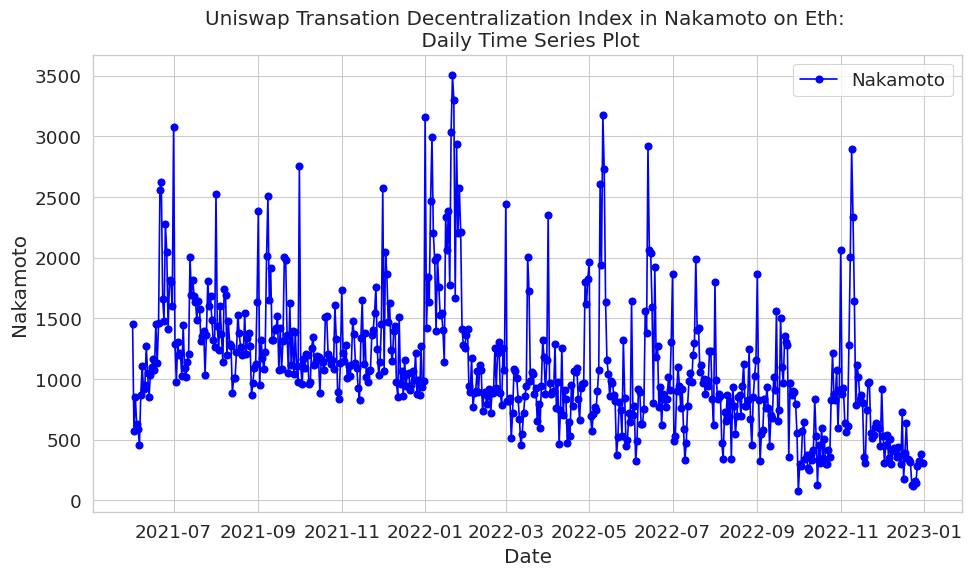

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Nakamoto', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Nakamoto on Eth: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Nakamoto')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Eth_nakamoto.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()
